In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target == 1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==2]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
import matplotlib.pyplot as plt

In [11]:
df0 = df[df.target == 1]
df1 = df[df.target == 2]
df2 = df[df.target == 3]

In [12]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


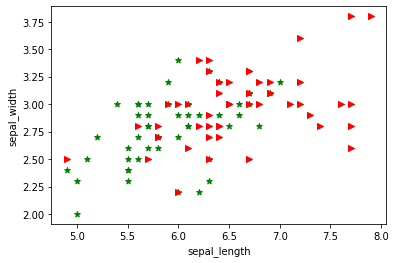

In [13]:
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
#plt.legend()
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker = '*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker = '>')

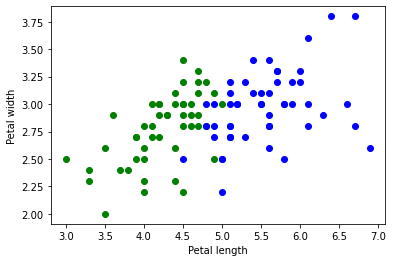

In [14]:
plt.xlabel('Petal length')
plt.ylabel('Petal width')
#plt.legend()
plt.scatter(df0['petal length (cm)'], df0['sepal width (cm)'], color = 'green')
plt.scatter(df1['petal length (cm)'], df1['sepal width (cm)'], color = 'blue')
plt.show()

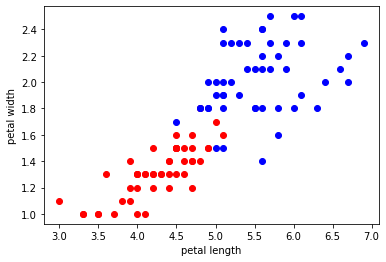

In [15]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue')
plt.show()

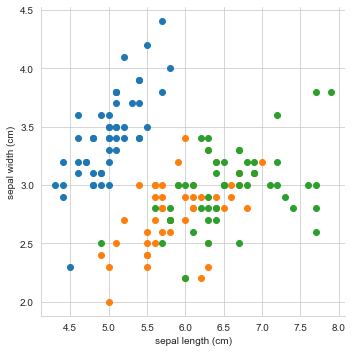

In [17]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = 'flower_names', size=5).map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_names'], axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [20]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2)
len(x_train)

120

In [21]:
from sklearn.svm import SVC
clf = SVC(kernel= 'linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [22]:
clf.score(x_test, y_test)

1.0